# Machine Learing using H2O in R
This demo will focus on performing a Kmeans clustering analysis for a data set using the R interface to the H2O machine learning platform. H2O is a java based machine learning platform that provides an R interface. If you don't yet have H2O installed in your R you can install by doing the following:

In [ ]:
# The following two commands remove any previously installed H2O packages for R.
if ("package:h2o" %in% search()) { detach("package:h2o", unload=TRUE) }
if ("h2o" %in% rownames(installed.packages())) { remove.packages("h2o") }

# Next, we download packages that H2O depends on.
if (! ("methods" %in% rownames(installed.packages()))) { install.packages("methods") }
if (! ("statmod" %in% rownames(installed.packages()))) { install.packages("statmod") }
if (! ("stats" %in% rownames(installed.packages()))) { install.packages("stats") }
if (! ("graphics" %in% rownames(installed.packages()))) { install.packages("graphics") }
if (! ("RCurl" %in% rownames(installed.packages()))) { install.packages("RCurl") }
if (! ("jsonlite" %in% rownames(installed.packages()))) { install.packages("jsonlite") }
if (! ("tools" %in% rownames(installed.packages()))) { install.packages("tools") }
if (! ("utils" %in% rownames(installed.packages()))) { install.packages("utils") }

# Now we download, install and initialize the H2O package for R.
install.packages("h2o", type="source", repos=(c("http://h2o-release.s3.amazonaws.com/h2o/rel-turing/9/R")))

You'll also need a fairly recent and working version of Java installed on your system. This shouldn't be an issue for most people. If you don't yet have R installed on your machine, you've come to the wrong notebook...

This tutorial uses data from http://archive.ics.uci.edu/ml/datasets/seeds. The data file `seeds_dataset.txt` contains 210 observations of 7 variables with an *a priori* grouping assignment.

We begin by importing the data into a initializing the H2O library and runtime environment. H2O runs as a seperate Java process and the cluster initialization has many options (use `?h2o.init` to explore these). 

In [1]:
library('h2o')

h2o.init(nthreads=1)

Loading required package: statmod

----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: ‘h2o’

The following objects are masked from ‘package:stats’:

    cor, sd, var

The following objects are masked from ‘package:base’:

    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc




H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /var/folders/gg/jl242r6h8xl2h8006s6ks6880000gn/T//Rtmp7d4HkJ/h2o_scamicha_started_from_r.out
    /var/folders/gg/jl242r6h8xl2h8006s6ks6880000gn/T//Rtmp7d4HkJ/h2o_scamicha_started_from_r.err


Starting H2O JVM and connecting: .. Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         2 seconds 435 milliseconds 
    H2O cluster version:        3.10.0.9 
    H2O cluster version age:    15 days  
    H2O cluster name:           H2O_started_from_R_scamicha_ltl758 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   0.12 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  1 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    R Version:                  R version 3.3.1 (2016-06-21) 



Next we'll get started with some data. Download the dataset `seeds_dataset.txt` and save it in the directory containing this notebook. To import data into H2O we use the `h2o.importFile()` function. The H2O data structures are seperate from R data structures, with some key differenences. However, we can export H2O structures as R data frames. 

In [2]:
#Import data from text file
seeds.hex <- h2o.importFile('./seeds_dataset.txt')
#create R data frame
seedsDF <- as.data.frame(seeds.hex)
#inspect R data frame
head(seedsDF)
summary(seedsDF)

  |======================================================================| 100%


C1,C2,C3,C4,C5,C6,C7,C8
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


       C1              C2              C3               C4        
 Min.   :10.59   Min.   :12.41   Min.   :0.8081   Min.   :0.8189  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:0.8577   1st Qu.:5.2447  
 Median :14.36   Median :14.32   Median :0.8735   Median :5.5180  
 Mean   :14.85   Mean   :14.56   Mean   :0.8713   Mean   :5.5639  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:0.8877   3rd Qu.:5.9798  
 Max.   :21.18   Max.   :17.25   Max.   :0.9183   Max.   :6.6750  
                                 NA's   :3                        
       C5              C6               C7              C8       
 Min.   :2.630   Min.   :0.7651   Min.   :3.485   Min.   :1.000  
 1st Qu.:2.956   1st Qu.:2.6002   1st Qu.:5.045   1st Qu.:1.000  
 Median :3.245   Median :3.5990   Median :5.226   Median :2.000  
 Mean   :3.281   Mean   :3.6935   Mean   :5.408   Mean   :2.084  
 3rd Qu.:3.566   3rd Qu.:4.7687   3rd Qu.:5.879   3rd Qu.:3.000  
 Max.   :5.325   Max.   :8.4560   Max.   :6.735   Max.   :5.439  
 N

Clean up the data and re-import.

In [3]:
#Import data from text file
seeds.hex <- h2o.importFile('./seeds_dataset_fixed.txt')
#create R data frame
seedsDF <- as.data.frame(seeds.hex)
#inspect R data frame
head(seedsDF)
summary(seedsDF)
#Remove correct answers
seedsCOR <- as.factor(seedsDF$C8)
seedsDF$C8 <- NULL

  |======================================================================| 100%


C1,C2,C3,C4,C5,C6,C7,C8
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


       C1              C2              C3               C4       
 Min.   :10.59   Min.   :12.41   Min.   :0.8081   Min.   :4.899  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:0.8569   1st Qu.:5.262  
 Median :14.36   Median :14.32   Median :0.8734   Median :5.524  
 Mean   :14.85   Mean   :14.56   Mean   :0.8710   Mean   :5.629  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:0.8878   3rd Qu.:5.980  
 Max.   :21.18   Max.   :17.25   Max.   :0.9183   Max.   :6.675  
       C5              C6               C7              C8   
 Min.   :2.630   Min.   :0.7651   Min.   :4.519   Min.   :1  
 1st Qu.:2.944   1st Qu.:2.5615   1st Qu.:5.045   1st Qu.:1  
 Median :3.237   Median :3.5990   Median :5.223   Median :2  
 Mean   :3.259   Mean   :3.7002   Mean   :5.408   Mean   :2  
 3rd Qu.:3.562   3rd Qu.:4.7687   3rd Qu.:5.877   3rd Qu.:3  
 Max.   :4.033   Max.   :8.4560   Max.   :6.550   Max.   :3  

We now have imported the data into an H2O data object and have access to it as an R data frame. It is important to remember that these are two seperate objects and altering one will not change the other. Next let's construct a Kmeans clustering model using the H2O function kmeans, and inspect the results.

In [4]:
seedsKM <- h2o.kmeans(training_frame = seeds.hex, k=3, init="PlusPlus", max_iterations = 100, 
                      x=c('C1','C2','C3','C4','C5','C6','C7'))
summary(seedsKM)
h2o.centers(seedsKM)

  |======================================================================| 100%
Model Details:

H2OClusteringModel: kmeans
Model Key:  KMeans_model_R_1478809643300_1 
Model Summary: 
  number_of_rows number_of_clusters number_of_categorical_columns
1            210                  3                             0
  number_of_iterations within_cluster_sum_of_squares total_sum_of_squares
1                    5                     429.07559           1463.00000
  between_cluster_sum_of_squares
1                     1033.92441

H2OClusteringMetrics: kmeans
** Reported on training data. **


Total Within SS:  429.0756
Between SS:  1033.924
Total SS:  1463 
Centroid Statistics: 
  centroid     size within_cluster_sum_of_squares
1        1 65.00000                     115.33229
2        2 70.00000                     153.71432
3        3 75.00000                     160.02897




Scoring History: 
            timestamp   duration iteration number_of_reassigned_observations
1 2016-11-10 15:28:

c1,c2,c3,c4,c5,c6,c7
11.81646,13.24215,0.846060,5.237600,2.834354,4.919415,5.121846
18.37971,16.15614,0.883620,6.163700,3.681986,3.606286,6.028586
14.17773,14.21040,0.880832,5.467853,3.231133,2.731203,5.076987


We now have a model based on the data. Let's see how well the clustering algorithm performed. First we can get the cluster predictions from the model and plot them against the principal components. 

  |======================================================================| 100%


Warning message in summary.H2OFrame(seedsFIT):
“Approximated quantiles computed! If you are interested in exact quantiles, please pass the `exact_quantiles=TRUE` parameter.”

 predict        
 Min.   :0.000  
 1st Qu.:0.000  
 Median :1.000  
 Mean   :1.048  
 3rd Qu.:2.000  
 Max.   :2.000  

[1] "environment"

Warning message in summary.H2OFrame(seedsFIT):
“Approximated quantiles computed! If you are interested in exact quantiles, please pass the `exact_quantiles=TRUE` parameter.”

 predict
 2:75   
 1:70   
 0:65   

ERROR: Error in as.integer(clvecd): cannot coerce type 'environment' to vector of type 'integer'


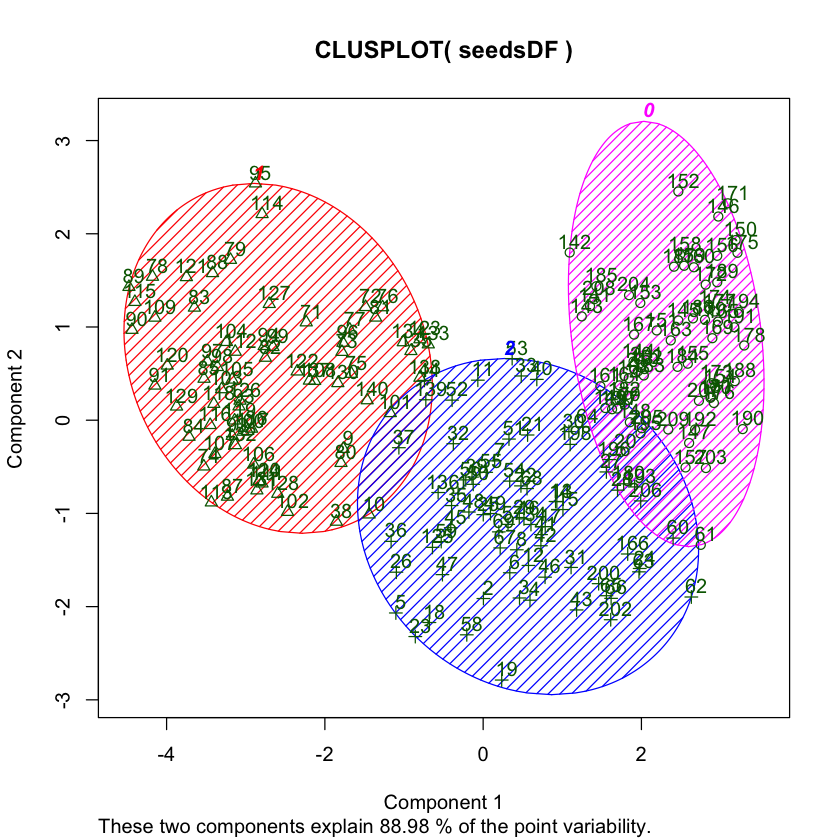

In [11]:
library(fpc)
library(cluster)
seedsFIT <- h2o.predict(seedsKM, seeds.hex)
summary(seedsFIT)
seedsFIT <- as.factor(as.numeric(seedsFIT$predict))
typeof(seedsFIT)
summary(seedsFIT)
clusplot(seedsDF, seedsFIT, color=TRUE, shade=TRUE, labels=2, lines=0)
plotcluster(seedsDF, seedsFIT)

Finally, let's check for correctness.

In [ ]:
library(plyr)
revalue(seedsFIT, c('0'='1','1'='3'))
seedsFIT <- factor(seedsFIT, levels=c(1,2,3))
table(seedsFIT, seedsCOR)
h2o.shutdown()